In [1]:
import xarray as xr
import earthaccess
import boto3
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import warnings
from IPython.display import display, Markdown

In [10]:
# Authenticate using Earthdata Login prerequisite files
auth = earthaccess.login()

# Search for the granule by DOI
results = earthaccess.search_data(
    doi='10.5067/RKPHT8KC1Y1T',
    temporal=("2022-03-01", "2022-03-31"),
)

In [3]:
results

[Collection: {'ShortName': 'M2T1NXLND', 'Version': '5.12.4'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180.0, 'EastBoundingCoordinate': 180.0, 'NorthBoundingCoordinate': 90.0, 'SouthBoundingCoordinate': -90.0}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2019-03-13T00:00:00.000Z', 'EndingDateTime': '2019-03-13T23:59:59.000Z'}}
 Size(MB): 197.52595329284668
 Data: ['https://data.gesdisc.earthdata.nasa.gov/data/MERRA2/M2T1NXLND.5.12.4/2019/03/MERRA2_400.tavg1_2d_lnd_Nx.20190313.nc4']]

In [11]:
fn = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/31 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/31 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/31 [00:00<?, ?it/s]

In [12]:
ds = xr.open_mfdataset(fn)

In [13]:
ds['SNODP']

<xarray.DataArray 'SNODP' (time: 744, lat: 361, lon: 576)> Size: 619MB
dask.array<concatenate, shape=(744, 361, 576), dtype=float32, chunksize=(1, 91, 144), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 5kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 6kB 2022-03-01T00:30:00 ... 2022-03-31T23:...
Attributes:
    long_name:       snow_depth
    units:           m
    fmissing_value:  1000000000000000.0
    standard_name:   snow_depth
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

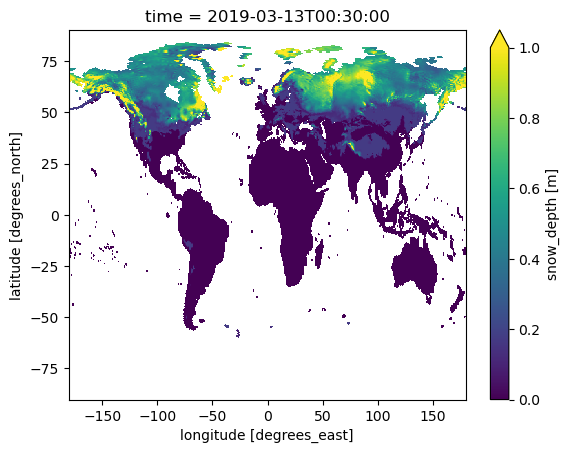

In [9]:
ds['SNODP'][0,:,:].plot(vmin=0, vmax=1)

In [17]:
mask_lon = (ds.lon >= -168.75) & (ds.lon <= -136.01)
mask_lat = (ds.lat >= 52.64) & (ds.lat <= 71.59)

ds_ak = ds.where(mask_lon & mask_lat, drop=True)

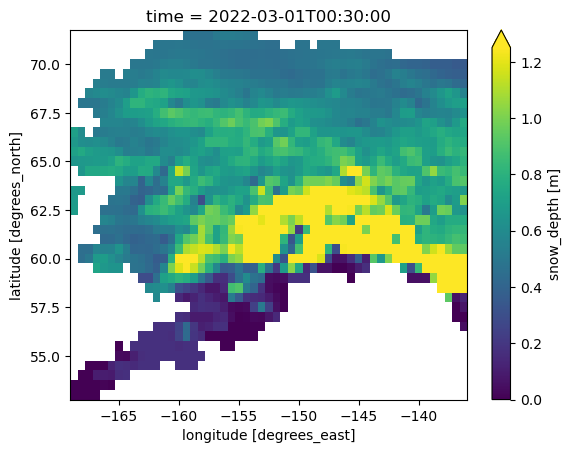

In [20]:
ds_ak['SNODP'][0,:,:].plot(vmin=0, vmax=1.25)

In [21]:
ak_daily_mean = ds_ak.resample(time='D').mean()

In [26]:
ak_daily_mean

<xarray.Dataset> Size: 12MB
Dimensions:      (time: 31, lat: 38, lon: 53)
Coordinates:
  * lon          (lon) float64 424B -168.8 -168.1 -167.5 ... -136.9 -136.2
  * lat          (lat) float64 304B 53.0 53.5 54.0 54.5 ... 70.0 70.5 71.0 71.5
  * time         (time) datetime64[ns] 248B 2022-03-01 2022-03-02 ... 2022-03-31
Data variables: (12/50)
    BASEFLOW     (time, lat, lon) float32 250kB dask.array<chunksize=(1, 38, 53), meta=np.ndarray>
    ECHANGE      (time, lat, lon) float32 250kB dask.array<chunksize=(1, 38, 53), meta=np.ndarray>
    EVLAND       (time, lat, lon) float32 250kB dask.array<chunksize=(1, 38, 53), meta=np.ndarray>
    EVPINTR      (time, lat, lon) float32 250kB dask.array<chunksize=(1, 38, 53), meta=np.ndarray>
    EVPSBLN      (time, lat, lon) float32 250kB dask.array<chunksize=(1, 38, 53), meta=np.ndarray>
    EVPSOIL      (time, lat, lon) float32 250kB dask.array<chunksize=(1, 38, 53), meta=np.ndarray>
    ...           ...
    TSOIL6       (time, lat, lon) float32 250kB dask.array<chunksize=(1, 38, 53), meta=np.ndarray>
    TSURF        (time, lat, lon) float32 250kB dask.array<chunksize=(1, 38, 53), meta=np.ndarray>
    TUNST        (time, lat, lon) float32 250kB dask.array<chunksize=(1, 38, 53), meta=np.ndarray>
    TWLAND       (time, lat, lon) float32 250kB dask.array<chunksize=(1, 38, 53), meta=np.ndarray>
    TWLT         (time, lat, lon) float32 250kB dask.array<chunksize=(1, 38, 53), meta=np.ndarray>
    WCHANGE      (time, lat, lon) float32 250kB dask.array<chunksize=(1, 38, 53), meta=np.ndarray>
Attributes: (12/30)
    History:                           Original file generated: Fri Mar 11 22...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_lnd_Nx.20220301.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/RKPHT8KC1Y1T
    RangeBeginningDate:                2022-03-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2022-03-01
    RangeEndingTime:                   23:59:59.000000

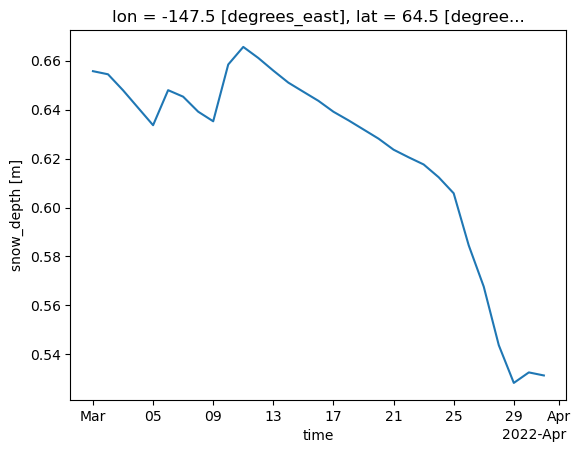

In [28]:
ak_daily_mean['SNODP'][:,23,34].plot() 